In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
movie=pd.read_csv('my_movies.csv')
movie.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [3]:
num_movie = movie.iloc[:,5:15]
num_movie.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


## Apriori Algorithm

In [4]:
frequent_itemsets_ap = apriori(num_movie, min_support=0.15, use_colnames=True)
print(frequent_itemsets_ap.head())

   support         itemsets
0      0.6    (Sixth Sense)
1      0.7      (Gladiator)
2      0.2          (LOTR1)
3      0.2  (Harry Potter1)
4      0.6        (Patriot)


C:\Users\91949\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


In [5]:
frequent_itemsets_ap.sort_values("support", ascending = False).shape

(13, 2)

In [6]:
rules_ap = association_rules(frequent_itemsets_ap, metric="confidence", min_threshold=0.1)
print(rules_ap.head())

     antecedents    consequents  antecedent support  consequent support  \
0  (Sixth Sense)    (Gladiator)                 0.6                 0.7   
1    (Gladiator)  (Sixth Sense)                 0.7                 0.6   
2  (Sixth Sense)      (Patriot)                 0.6                 0.6   
3      (Patriot)  (Sixth Sense)                 0.6                 0.6   
4  (Sixth Sense)   (Green Mile)                 0.6                 0.2   

   support  confidence      lift  leverage  conviction  zhangs_metric  
0      0.5    0.833333  1.190476      0.08         1.8       0.400000  
1      0.5    0.714286  1.190476      0.08         1.4       0.533333  
2      0.4    0.666667  1.111111      0.04         1.2       0.250000  
3      0.4    0.666667  1.111111      0.04         1.2       0.250000  
4      0.2    0.333333  1.666667      0.08         1.2       1.000000  


In [7]:
rules_ap[(rules_ap.support > 0.015) & (rules_ap.confidence > 0.4)].sort_values("confidence", ascending = False).shape

(15, 10)

In [8]:
rules_ap['lhs items'] = rules_ap['antecedents'].apply(lambda x:len(x) )
rules_ap[rules_ap['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,lhs items
11,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.50,2
10,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.50,2
12,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.25,2


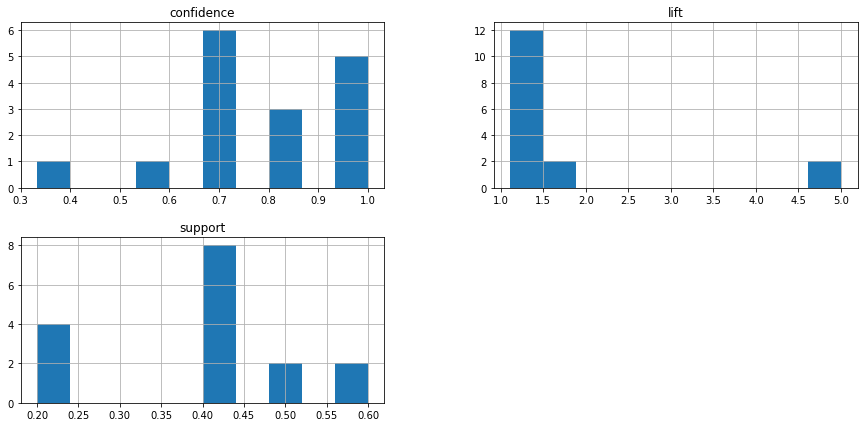

In [9]:
import matplotlib.pyplot as plt
rules_ap[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

In [10]:
rules_aps_li = association_rules(frequent_itemsets_ap, metric="lift", min_threshold=0.8)
print(rules_aps_li.shape)

(16, 10)


In [11]:
rules_aps_li['lhs items'] = rules_ap['antecedents'].apply(lambda x:len(x) )
rules_aps_li[rules_ap['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,lhs items
11,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.50,2
10,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.50,2
12,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.25,2


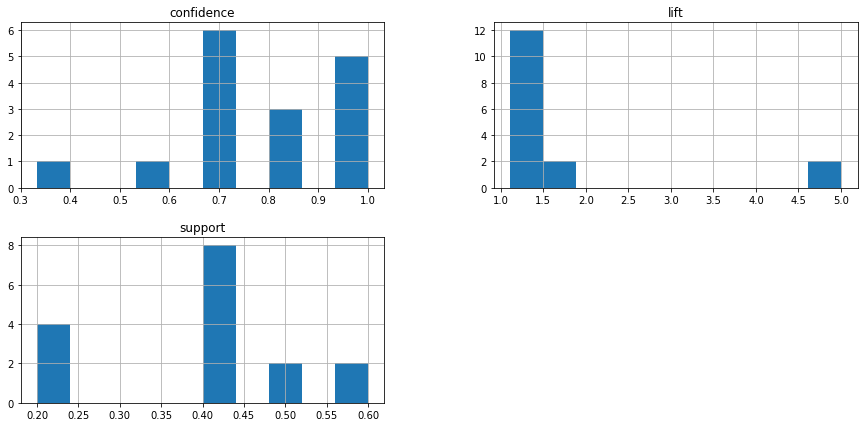

In [12]:
import matplotlib.pyplot as plt
rules_aps_li[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()